In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [2]:
# Define output functions or `mean returns'
def G1(x):
    return np.sqrt(x) 

def G2(x):
    return np.sqrt(x)

# Define variance functions
def sigma_squared_linear(delta, k):
    return k * delta

def sigma_squared_quadratic(delta, k):
    return k * delta**2

def sigma_squared_constant(sigma):
    return sigma**2

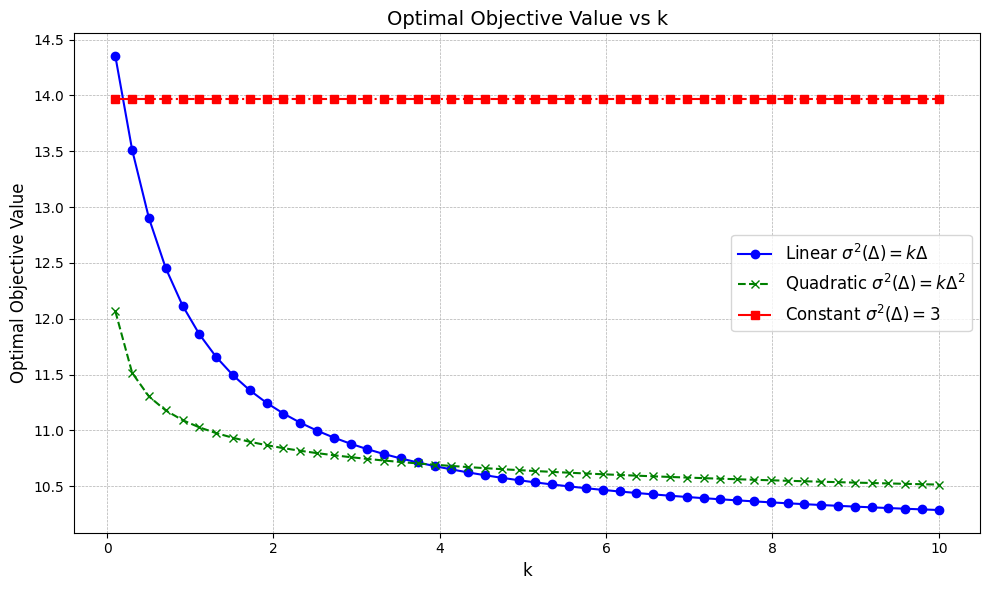

In [3]:
lambda_param = 0.1 # Lambda, tradeoff between mean and variance
k_values = np.linspace(0.1, 10, 50)  # Range of k values
constant_sigma = 3  # Constant variance

optimal_values_linear = []
optimal_values_quadratic = []
optimal_values_constant = []
optimal_delta_linear = []
optimal_delta_quadratic = []

# Perform simulation for linear variance
for k in k_values:
    delta = cp.Variable()
    sigma = cp.sqrt(sigma_squared_linear(delta, k))
    G1_term = cp.sqrt(100 - delta)
    G2_term = 1.1 * cp.sqrt(delta)
    penalty_term = lambda_param * sigma_squared_linear(delta, k)
    
    objective = cp.Maximize(G1_term + G2_term - penalty_term)
    constraints = [delta >= 0, delta <= 100]
    
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    optimal_values_linear.append(prob.value)
    optimal_delta_linear.append(delta.value)

# Perform simulation for quadratic variance
for k in k_values:
    delta = cp.Variable()
    sigma = cp.sqrt(sigma_squared_quadratic(delta, k))
    G1_term = cp.sqrt(100 - delta)
    G2_term = 1.1 * cp.sqrt(delta)
    penalty_term = lambda_param * sigma_squared_quadratic(delta, k)
    
    objective = cp.Maximize(G1_term + G2_term - penalty_term)
    constraints = [delta >= 0, delta <= 100]
    
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    optimal_values_quadratic.append(prob.value)
    optimal_delta_quadratic.append(delta.value)

# Perform simulation for constant variance
delta = cp.Variable()
sigma = constant_sigma
G1_term = cp.sqrt(100 - delta)
G2_term = 1.1* cp.sqrt(delta)
penalty_term = lambda_param * sigma_squared_constant(sigma)

objective = cp.Maximize(G1_term + G2_term - penalty_term)
constraints = [delta >= 0, delta <= 100]

prob = cp.Problem(objective, constraints)
prob.solve()

optimal_value_constant = prob.value

optimal_values_constant = [optimal_value_constant] * len(k_values)

# Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(k_values, optimal_values_linear, marker='o', color='blue', linestyle='-', label='Linear $\sigma^2(\Delta) = k\Delta$')
plt.plot(k_values, optimal_values_quadratic, marker='x', color='green', linestyle='--', label='Quadratic $\sigma^2(\Delta) = k\Delta^2$')
plt.plot(k_values, optimal_values_constant, marker='s', color='red', linestyle='-.', label='Constant $\sigma^2(\Delta) = 3$')

plt.xlabel('k', fontsize=12)
plt.ylabel('Optimal Objective Value', fontsize=12)
plt.title('Optimal Objective Value vs k', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig('optimal_objective_value_vs_k.png', dpi=500)
plt.show()

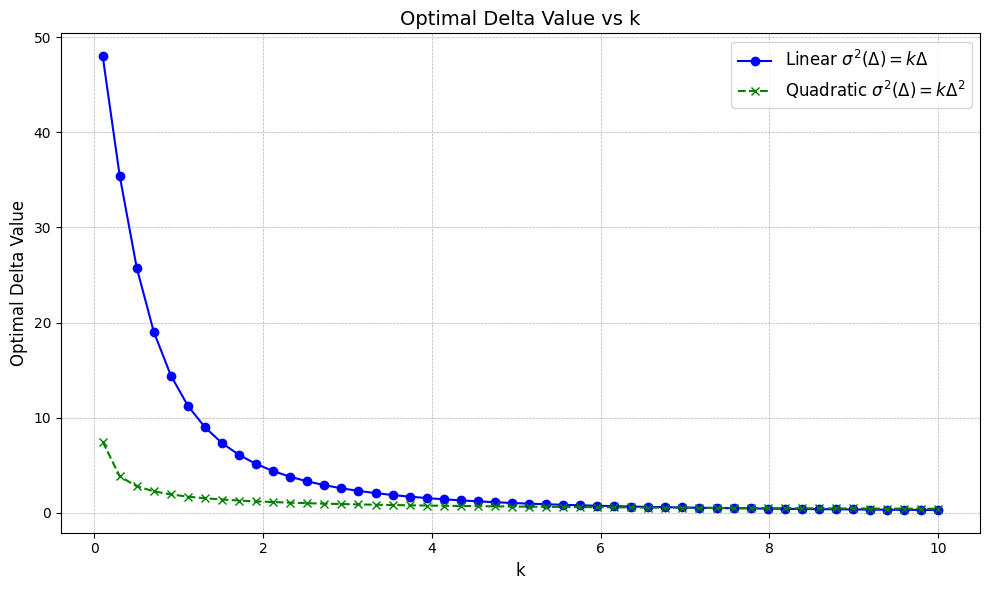

In [4]:
# Plotting the optimal delta values
plt.figure(figsize=(10, 6))
plt.plot(k_values, optimal_delta_linear, marker='o', color='blue', linestyle='-', label='Linear $\sigma^2(\Delta) = k\Delta$')
plt.plot(k_values, optimal_delta_quadratic, marker='x', color='green', linestyle='--', label='Quadratic $\sigma^2(\Delta) = k\Delta^2$')
plt.xlabel('k', fontsize=12)
plt.ylabel('Optimal Delta Value', fontsize=12)
plt.title('Optimal Delta Value vs k', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('optimal_delta_value_vs_k.png', dpi=500)
plt.show()

/opt/homebrew/lib/python3.11/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


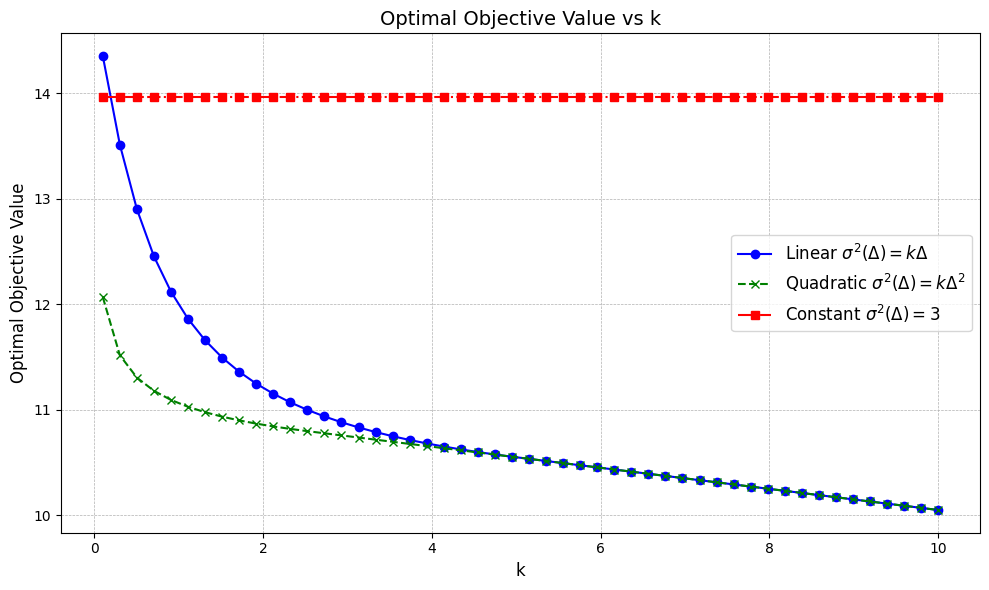

In [5]:
lambda_param = 0.1 # Lambda, tradeoff between mean and variance
k_values = np.linspace(0.1, 10, 50)  # Range of k values
constant_sigma = 3  # Constant variance

optimal_values_linear = []
optimal_values_quadratic = []
optimal_values_constant = []
optimal_delta_linear = []
optimal_delta_quadratic = []

# Perform simulation for linear variance
for k in k_values:
    delta = cp.Variable()
    sigma = cp.sqrt(sigma_squared_linear(delta, k))
    G1_term = cp.sqrt(100 - delta)
    G2_term = 1.1 * cp.sqrt(delta)
    penalty_term = lambda_param * sigma_squared_linear(delta, k)
    
    objective = cp.Maximize(G1_term + G2_term - penalty_term)
    constraints = [delta >= 1, delta <= 100]
    
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    optimal_values_linear.append(prob.value)
    optimal_delta_linear.append(delta.value)

# Perform simulation for quadratic variance
for k in k_values:
    delta = cp.Variable()
    sigma = cp.sqrt(sigma_squared_quadratic(delta, k))
    G1_term = cp.sqrt(100 - delta)
    G2_term = 1.1 * cp.sqrt(delta)
    penalty_term = lambda_param * sigma_squared_quadratic(delta, k)
    
    objective = cp.Maximize(G1_term + G2_term - penalty_term)
    constraints = [delta >= 1, delta <= 100]
    
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    optimal_values_quadratic.append(prob.value)
    optimal_delta_quadratic.append(delta.value)

# Perform simulation for constant variance
delta = cp.Variable()
sigma = constant_sigma
G1_term = cp.sqrt(100 - delta)
G2_term = 1.1* cp.sqrt(delta)
penalty_term = lambda_param * sigma_squared_constant(sigma)

objective = cp.Maximize(G1_term + G2_term - penalty_term)
constraints = [delta >= 1, delta <= 100]

prob = cp.Problem(objective, constraints)
prob.solve()

optimal_value_constant = prob.value

optimal_values_constant = [optimal_value_constant] * len(k_values)

# Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(k_values, optimal_values_linear, marker='o', color='blue', linestyle='-', label='Linear $\sigma^2(\Delta) = k\Delta$')
plt.plot(k_values, optimal_values_quadratic, marker='x', color='green', linestyle='--', label='Quadratic $\sigma^2(\Delta) = k\Delta^2$')
plt.plot(k_values, optimal_values_constant, marker='s', color='red', linestyle='-.', label='Constant $\sigma^2(\Delta) = 3$')

plt.xlabel('k', fontsize=12)
plt.ylabel('Optimal Objective Value', fontsize=12)
plt.title('Optimal Objective Value vs k', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig('optimal_objective_value_vs_k.png', dpi=500)
plt.show()

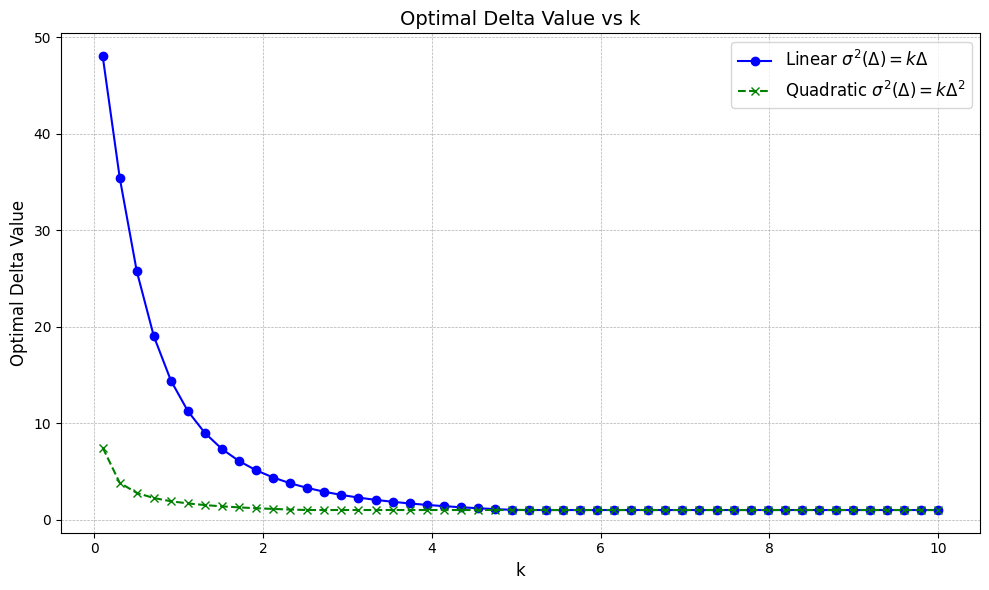

In [6]:
# Plotting the optimal delta values
plt.figure(figsize=(10, 6))
plt.plot(k_values, optimal_delta_linear, marker='o', color='blue', linestyle='-', label='Linear $\sigma^2(\Delta) = k\Delta$')
plt.plot(k_values, optimal_delta_quadratic, marker='x', color='green', linestyle='--', label='Quadratic $\sigma^2(\Delta) = k\Delta^2$')
plt.xlabel('k', fontsize=12)
plt.ylabel('Optimal Delta Value', fontsize=12)
plt.title('Optimal Delta Value vs k', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('optimal_delta_value_vs_k.png', dpi=500)
plt.show()

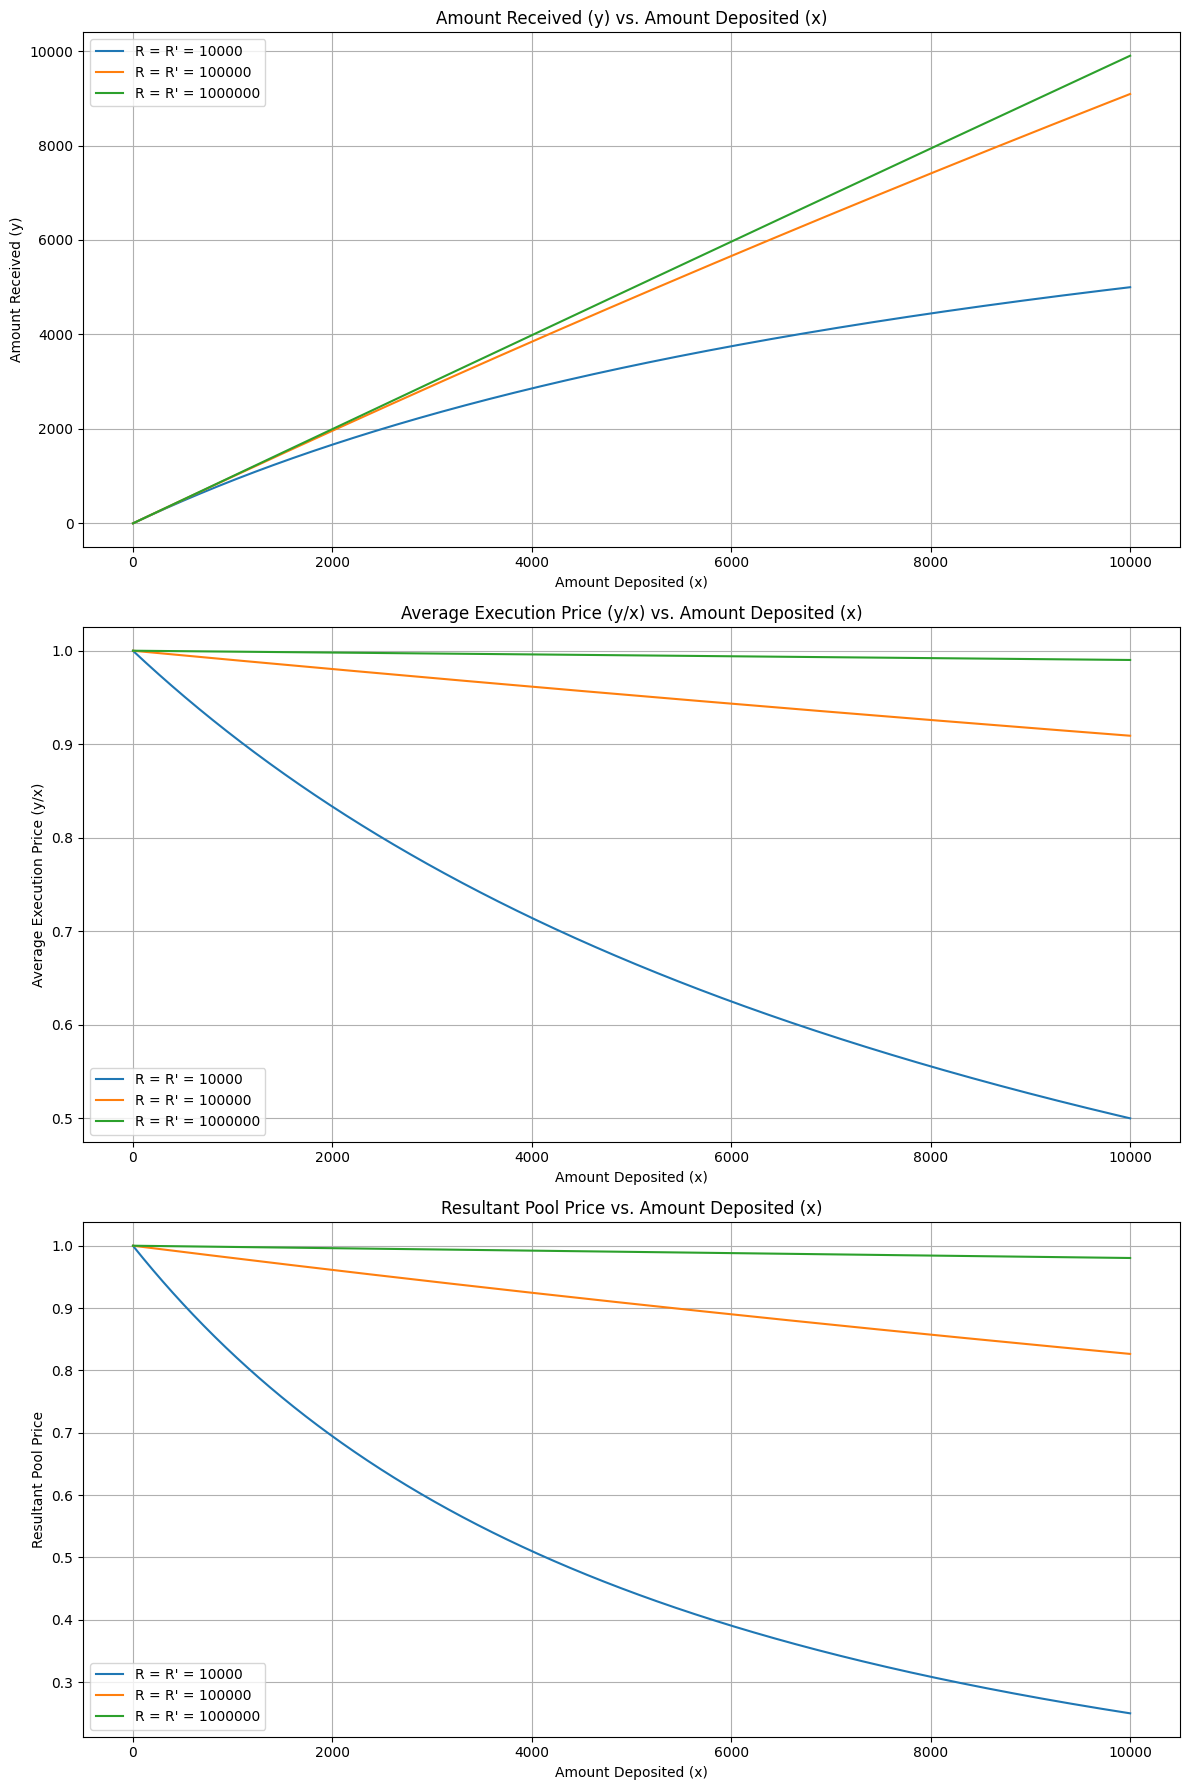

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_y(R, Rp, x):
    return Rp - (R * Rp) / (R + x)

def calculate_avg_price(x, y):
    return y / x

def calculate_pool_price(R, Rp, x, y):
    return (Rp - y) / (R + x)

def plot_amm_model(R_values):
    x_values = np.linspace(1, 10000, 1000)
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))
    
    for R in R_values:
        Rp = R
        y_values = [calculate_y(R, Rp, x) for x in x_values]
        avg_prices = [calculate_avg_price(x, y) for x, y in zip(x_values, y_values)]
        pool_prices = [calculate_pool_price(R, Rp, x, y) for x, y in zip(x_values, y_values)]
        
        ax1.plot(x_values, y_values, label=f'R = R\' = {R}')
        ax2.plot(x_values, avg_prices, label=f'R = R\' = {R}')
        ax3.plot(x_values, pool_prices, label=f'R = R\' = {R}')
    
    ax1.set_title('Amount Received (y) vs. Amount Deposited (x)')
    ax1.set_xlabel('Amount Deposited (x)')
    ax1.set_ylabel('Amount Received (y)')
    ax1.legend()
    ax1.grid(True)
    
    ax2.set_title('Average Execution Price (y/x) vs. Amount Deposited (x)')
    ax2.set_xlabel('Amount Deposited (x)')
    ax2.set_ylabel('Average Execution Price (y/x)')
    ax2.legend()
    ax2.grid(True)
    
    ax3.set_title('Resultant Pool Price vs. Amount Deposited (x)')
    ax3.set_xlabel('Amount Deposited (x)')
    ax3.set_ylabel('Resultant Pool Price')
    ax3.legend()
    ax3.grid(True)
    
    plt.tight_layout()
    plt.show()

# Plot for R = R' = 10000, 100000, 1000000
R_values = [10000, 100000, 1000000]
plot_amm_model(R_values)

In [8]:
## NEW MODEL

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [10]:
# Define output functions or `mean returns'
R1 = 20000
R0 = 10000

def G1(x):
    return 2-R1/R0**2 * x**2 

def G2(x, alpha):
    return (2-R1/R0**2*x**alpha)*x

# Define variance functions
def sigma_squared_linear(delta, k):
    return k * delta

def sigma_squared_quadratic(delta, k):
    return k * delta**2

def sigma_squared_constant(sigma):
    return sigma**2

In [11]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define constants
R1 = 20000
R0 = 10000
lambda_param = 0.1  # Lambda, tradeoff between mean and variance
constant_sigma = 3  # Constant variance

# Define output functions or 'mean returns'
def G1(x):
    return 2 - R1 / R0**2 * x**2 

def G2(x, alpha):
    return (2 - R1 / R0**2 * x**alpha) * x

# Define variance functions
def sigma_squared_linear(delta, k):
    return k * delta

def sigma_squared_quadratic(delta, k):
    return k * delta**2

def sigma_squared_constant(sigma):
    return sigma**2

# Create meshgrid for alpha and k values
alpha_values = np.linspace(0, 1, 20)
k_values = np.linspace(0, 5, 20)
alpha_mesh, k_mesh = np.meshgrid(alpha_values, k_values)

# Initialize arrays to store optimal values
optimal_values_linear = np.zeros_like(alpha_mesh)
optimal_values_quadratic = np.zeros_like(alpha_mesh)
optimal_values_constant = np.zeros_like(alpha_mesh)

# Perform simulations
for i, k in enumerate(k_values):
    for j, alpha in enumerate(alpha_values):
        delta = cp.Variable()
        
        # Precompute G2 term for the current alpha
        G2_term = (2 - R1 / R0**2 * delta**alpha) * delta
        
        # Linear variance
        G1_term = 2 - R1 / R0**2 * delta**2
        penalty_term = lambda_param * sigma_squared_linear(delta, k)
        
        objective = cp.Maximize(G1_term + G2_term - penalty_term)
        constraints = [delta >= 1, delta <= 100]
        
        prob = cp.Problem(objective, constraints)
        prob.solve()
        
        optimal_values_linear[i, j] = prob.value

        # Quadratic variance
        penalty_term = lambda_param * sigma_squared_quadratic(delta, k)
        
        objective = cp.Maximize(G1_term + G2_term - penalty_term)
        constraints = [delta >= 1, delta <= 100]
        
        prob = cp.Problem(objective, constraints)
        prob.solve()
        
        optimal_values_quadratic[i, j] = prob.value

        # Constant variance
        penalty_term = lambda_param * sigma_squared_constant(constant_sigma)
        
        objective = cp.Maximize(G1_term + G2_term - penalty_term)
        constraints = [delta >= 1, delta <= 100]
        
        prob = cp.Problem(objective, constraints)
        prob.solve()
        
        optimal_values_constant[i, j] = prob.value

# Plotting the results
def plot_3d_surface(ax, X, Y, Z, title):
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('α')
    ax.set_ylabel('k')
    ax.set_zlabel('Optimal Objective Value')
    ax.set_title(title)
    return surf

# Plot separate surfaces
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(131, projection='3d')
surf1 = plot_3d_surface(ax1, alpha_mesh, k_mesh, optimal_values_linear, 'Linear Variance')

ax2 = fig.add_subplot(132, projection='3d')
surf2 = plot_3d_surface(ax2, alpha_mesh, k_mesh, optimal_values_quadratic, 'Quadratic Variance')

ax3 = fig.add_subplot(133, projection='3d')
surf3 = plot_3d_surface(ax3, alpha_mesh, k_mesh, optimal_values_constant, 'Constant Variance')

plt.tight_layout()
#plt.savefig('separate_3d_surfaces.png', dpi=300)
plt.show()

# Plot linear and quadratic surfaces together
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_surface(alpha_mesh, k_mesh, optimal_values_linear, cmap='viridis', alpha=0.7)
surf2 = ax.plot_surface(alpha_mesh, k_mesh, optimal_values_quadratic, cmap='plasma', alpha=0.7)

ax.set_xlabel('α')
ax.set_ylabel('k')
ax.set_zlabel('Optimal Objective Value')
ax.set_title('Linear vs Quadratic Variance')

# Add a color bar which maps values to colors
fig.colorbar(surf1, shrink=0.5, aspect=5, label='Linear Variance')
fig.colorbar(surf2, shrink=0.5, aspect=5, label='Quadratic Variance')

plt.tight_layout()
#plt.savefig('combined_3d_surface.png', dpi=300)
plt.show()

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
(2.0 + -0.0002 @ power(var15039, 0.05263157894736842)) @ var15039

In [12]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define constants
R1 = 20000
R0 = 10000
lambda_param = 0.1  # Lambda, tradeoff between mean and variance
constant_sigma = 3  # Constant variance

# Define output functions or 'mean returns'
def G1(x):
    return 2*x - R1 / R0**2 * x**2 

def G2(x, alpha):
    return (2 - R1 / R0**2 * x**alpha) * x

# Define variance functions
def sigma_squared_linear(delta, k):
    return k * delta

def sigma_squared_quadratic(delta, k):
    return k * delta**2

def sigma_squared_constant(sigma):
    return sigma**2

# Create meshgrid for alpha and k values
alpha_values = np.linspace(0, 1, 20)
k_values = np.linspace(0, 5, 20)
alpha_mesh, k_mesh = np.meshgrid(alpha_values, k_values)

# Initialize arrays to store optimal values
optimal_values_linear = np.zeros_like(alpha_mesh)
optimal_values_quadratic = np.zeros_like(alpha_mesh)
optimal_values_constant = np.zeros_like(alpha_mesh)

# Perform simulations
for i, k in enumerate(k_values):
    for j, alpha in enumerate(alpha_values):
        delta = cp.Variable()
        
        # Define G1 and G2 terms
        G1_term = 2*(100-delta) - R1 / R0**2 * cp.power((100-delta), 2)
        G2_term = (2 - R1 / R0**2 * cp.power(delta, alpha)) * delta
        
        # Linear variance
        penalty_term = lambda_param * sigma_squared_linear(delta, k)
        
        objective = cp.Maximize(G1_term + G2_term - penalty_term)
        constraints = [delta >= 0, delta <= 100]
        
        prob = cp.Problem(objective, constraints)
        prob.solve()
        
        optimal_values_linear[i, j] = prob.value

        # Quadratic variance
        penalty_term = lambda_param * sigma_squared_quadratic(delta, k)
        
        objective = cp.Maximize(G1_term + G2_term - penalty_term)
        constraints = [delta >= 0, delta <= 100]
        
        prob = cp.Problem(objective, constraints)
        prob.solve()
        
        optimal_values_quadratic[i, j] = prob.value

        # Constant variance
        penalty_term = lambda_param * sigma_squared_constant(constant_sigma)
        
        objective = cp.Maximize(G1_term + G2_term - penalty_term)
        constraints = [delta >= 0, delta <= 100]
        
        prob = cp.Problem(objective, constraints)
        prob.solve()
        
        optimal_values_constant[i, j] = prob.value

# Plotting the results
def plot_3d_surface(ax, X, Y, Z, title):
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('α')
    ax.set_ylabel('k')
    ax.set_zlabel('Optimal Objective Value')
    ax.set_title(title)
    return surf

# Plot separate surfaces
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(131, projection='3d')
surf1 = plot_3d_surface(ax1, alpha_mesh, k_mesh, optimal_values_linear, 'Linear Variance')

ax2 = fig.add_subplot(132, projection='3d')
surf2 = plot_3d_surface(ax2, alpha_mesh, k_mesh, optimal_values_quadratic, 'Quadratic Variance')

ax3 = fig.add_subplot(133, projection='3d')
surf3 = plot_3d_surface(ax3, alpha_mesh, k_mesh, optimal_values_constant, 'Constant Variance')

plt.tight_layout()
#plt.savefig('separate_3d_surfaces.png', dpi=300)
plt.show()

# Plot linear and quadratic surfaces together
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_surface(alpha_mesh, k_mesh, optimal_values_linear, cmap='viridis', alpha=0.7)
surf2 = ax.plot_surface(alpha_mesh, k_mesh, optimal_values_quadratic, cmap='plasma', alpha=0.7)

ax.set_xlabel('α')
ax.set_ylabel('k')
ax.set_zlabel('Optimal Objective Value')
ax.set_title('Linear vs Quadratic Variance')

# Add a color bar which maps values to colors
fig.colorbar(surf1, shrink=0.5, aspect=5, label='Linear Variance')
fig.colorbar(surf2, shrink=0.5, aspect=5, label='Quadratic Variance')

plt.tight_layout()
#plt.savefig('combined_3d_surface.png', dpi=300)
plt.show()

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
(2.0 + -0.0002 @ power(var15224, 0.05263157894736842)) @ var15224

In [13]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define constants
R1 = 20000
R0 = 10000
lambda_param = 0.1  # Lambda, tradeoff between mean and variance
constant_sigma = 3  # Constant variance

# Create meshgrid for alpha and k values
alpha_values = np.linspace(0, 1, 20)
k_values = np.linspace(0, 5, 20)
alpha_mesh, k_mesh = np.meshgrid(alpha_values, k_values)

# Initialize arrays to store optimal values
optimal_values_linear = np.zeros_like(alpha_mesh)
optimal_values_quadratic = np.zeros_like(alpha_mesh)
optimal_values_constant = np.zeros_like(alpha_mesh)

# Perform simulations
for i, k in enumerate(k_values):
    for j, alpha in enumerate(alpha_values):
        delta = cp.Variable()
        
        # Define G1 and G2 terms
        G1_term = 2*(100-delta) - R1 / R0**2 * cp.square(100-delta)
        G2_term = (2 - R1 / R0**2 * cp.power(delta, alpha)) * delta
        
        # Linear variance
        penalty_term = lambda_param * k * delta
        
        objective = cp.Maximize(G1_term + G2_term - penalty_term)
        constraints = [delta >= 0, delta <= 100]
        
        prob = cp.Problem(objective, constraints)
        prob.solve()
        
        optimal_values_linear[i, j] = prob.value

        # Quadratic variance
        penalty_term = lambda_param * k * cp.square(delta)
        
        objective = cp.Maximize(G1_term + G2_term - penalty_term)
        constraints = [delta >= 0, delta <= 100]
        
        prob = cp.Problem(objective, constraints)
        prob.solve()
        
        optimal_values_quadratic[i, j] = prob.value

        # Constant variance
        penalty_term = lambda_param * constant_sigma**2
        
        objective = cp.Maximize(G1_term + G2_term - penalty_term)
        constraints = [delta >= 0, delta <= 100]
        
        prob = cp.Problem(objective, constraints)
        prob.solve()
        
        optimal_values_constant[i, j] = prob.value

# Plotting the results
def plot_3d_surface(ax, X, Y, Z, title):
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('α')
    ax.set_ylabel('k')
    ax.set_zlabel('Optimal Objective Value')
    ax.set_title(title)
    return surf

# Plot separate surfaces
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(131, projection='3d')
surf1 = plot_3d_surface(ax1, alpha_mesh, k_mesh, optimal_values_linear, 'Linear Variance')

ax2 = fig.add_subplot(132, projection='3d')
surf2 = plot_3d_surface(ax2, alpha_mesh, k_mesh, optimal_values_quadratic, 'Quadratic Variance')

ax3 = fig.add_subplot(133, projection='3d')
surf3 = plot_3d_surface(ax3, alpha_mesh, k_mesh, optimal_values_constant, 'Constant Variance')

plt.tight_layout()
plt.show()

# Plot linear and quadratic surfaces together
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_surface(alpha_mesh, k_mesh, optimal_values_linear, cmap='viridis', alpha=0.7)
surf2 = ax.plot_surface(alpha_mesh, k_mesh, optimal_values_quadratic, cmap='plasma', alpha=0.7)

ax.set_xlabel('α')
ax.set_ylabel('k')
ax.set_zlabel('Optimal Objective Value')
ax.set_title('Linear vs Quadratic Variance')

# Add a color bar which maps values to colors
fig.colorbar(surf1, shrink=0.5, aspect=5, label='Linear Variance')
fig.colorbar(surf2, shrink=0.5, aspect=5, label='Quadratic Variance')

plt.tight_layout()
plt.show()

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
(2.0 + -0.0002 @ power(var15410, 0.05263157894736842)) @ var15410

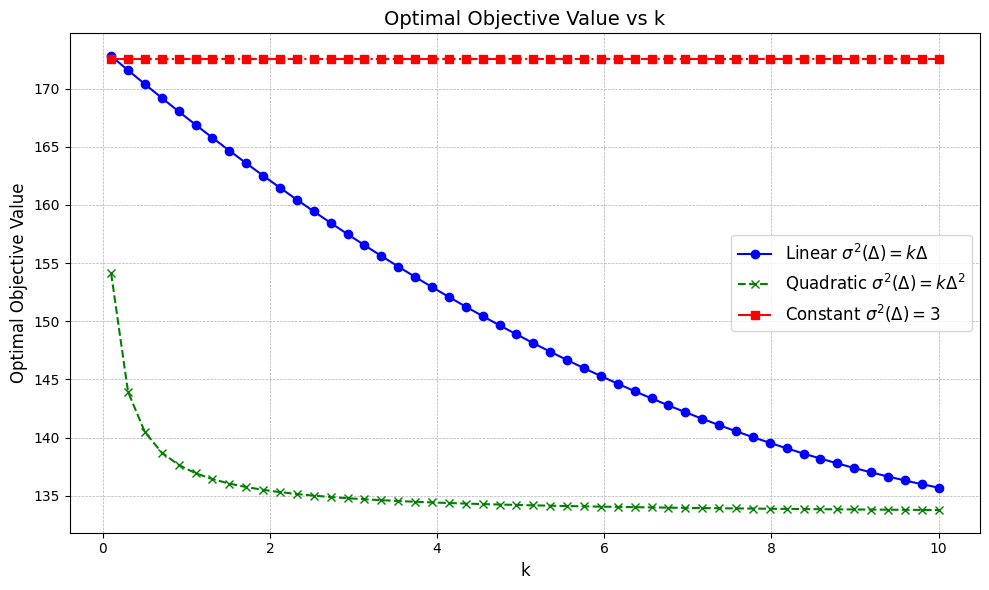

In [14]:
lambda_param = 0.1 # Lambda, tradeoff between mean and variance
k_values = np.linspace(0.1, 10, 50)  # Range of k values
constant_sigma = 3  # Constant variance
R1 = 600
R0 = 300

optimal_values_linear = []
optimal_values_quadratic = []
optimal_values_constant = []
optimal_delta_linear = []
optimal_delta_quadratic = []

# Perform simulation for linear variance
for k in k_values:
    delta = cp.Variable()
    sigma = cp.sqrt(sigma_squared_linear(delta, k))
    G1_term = 2*(100-delta) - R1 / R0**2 * cp.square(100-delta)
    G2_term = 2*delta - R1 / R0**2 * cp.power(delta, 1.9)
    penalty_term = lambda_param * sigma_squared_linear(delta, k)
    
    objective = cp.Maximize(G1_term + G2_term - penalty_term)
    constraints = [delta >= 0, delta <= 100]
    
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    optimal_values_linear.append(prob.value)
    optimal_delta_linear.append(delta.value)

# Perform simulation for quadratic variance
for k in k_values:
    delta = cp.Variable()
    sigma = cp.sqrt(sigma_squared_quadratic(delta, k))
    G1_term = 2*(100-delta) - R1 / R0**2 * cp.square(100-delta)
    G2_term = 2*delta - R1 / R0**2 * cp.power(delta, 1.9)
    penalty_term = lambda_param * sigma_squared_quadratic(delta, k)
    
    objective = cp.Maximize(G1_term + G2_term - penalty_term)
    constraints = [delta >= 0, delta <= 100]
    
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    optimal_values_quadratic.append(prob.value)
    optimal_delta_quadratic.append(delta.value)

# Perform simulation for constant variance
delta = cp.Variable()
sigma = constant_sigma
G1_term = 2*(100-delta) - R1 / R0**2 * cp.square(100-delta)
G2_term = 2*delta - R1 / R0**2 * cp.power(delta, 1.9)
penalty_term = lambda_param * sigma_squared_constant(sigma)

objective = cp.Maximize(G1_term + G2_term - penalty_term)
constraints = [delta >= 0, delta <= 100]

prob = cp.Problem(objective, constraints)
prob.solve()

optimal_value_constant = prob.value

optimal_values_constant = [optimal_value_constant] * len(k_values)

# Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(k_values, optimal_values_linear, marker='o', color='blue', linestyle='-', label='Linear $\sigma^2(\Delta) = k\Delta$')
plt.plot(k_values, optimal_values_quadratic, marker='x', color='green', linestyle='--', label='Quadratic $\sigma^2(\Delta) = k\Delta^2$')
plt.plot(k_values, optimal_values_constant, marker='s', color='red', linestyle='-.', label='Constant $\sigma^2(\Delta) = 3$')

plt.xlabel('k', fontsize=12)
plt.ylabel('Optimal Objective Value', fontsize=12)
plt.title('Optimal Objective Value vs k', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig('optimal_objective_value_vs_k.png', dpi=500)
plt.show()

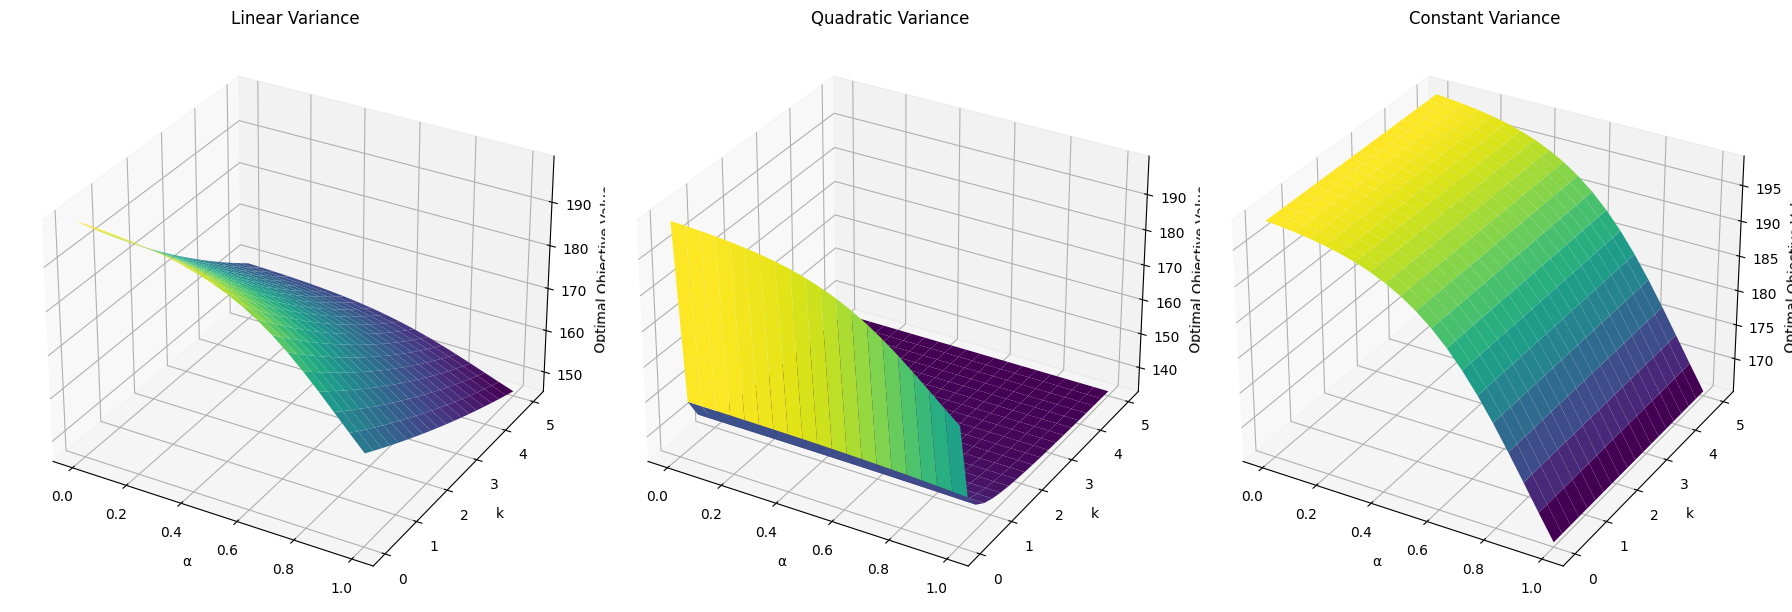

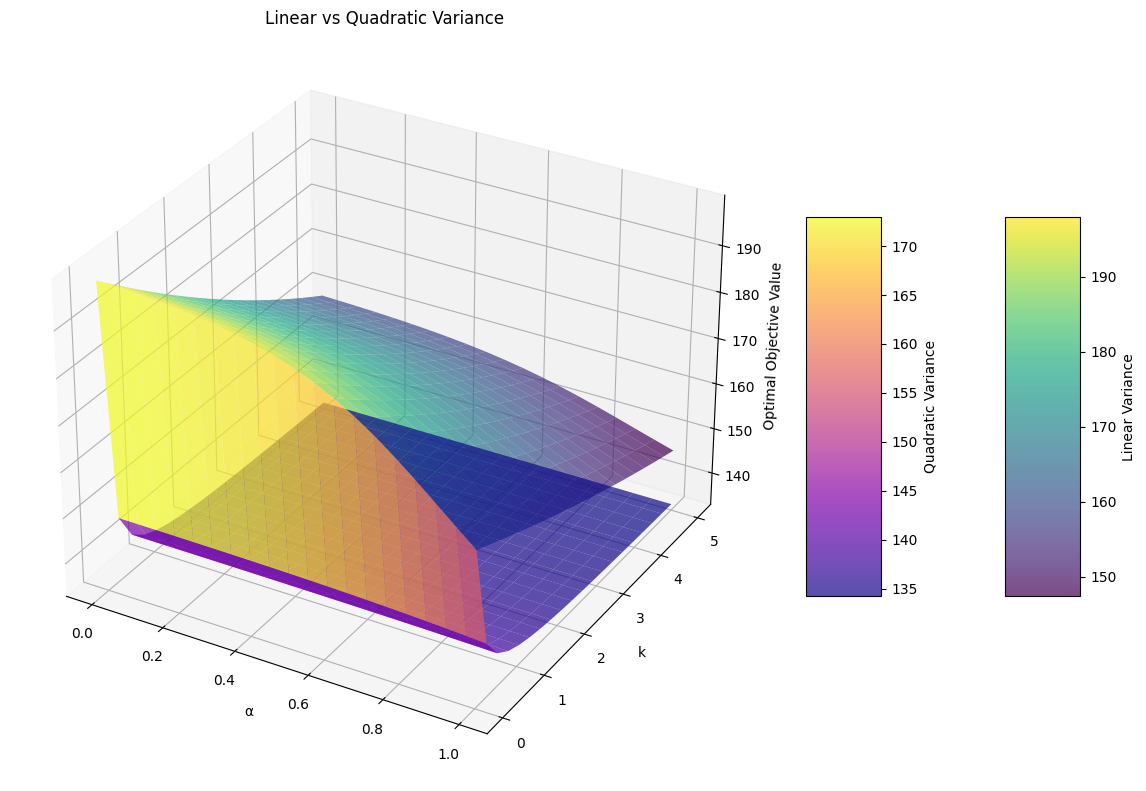

In [15]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define constants
lambda_param = 0.1  # Lambda, tradeoff between mean and variance
R1 = 600
R0 = 300
constant_sigma = 3  # Constant variance

# Define variance functions
def sigma_squared_linear(delta, k):
    return k * delta

def sigma_squared_quadratic(delta, k):
    return k * delta**2

def sigma_squared_constant(sigma):
    return sigma**2

# Create meshgrid for alpha and k values
alpha_values = np.linspace(0, 1, 20)
k_values = np.linspace(0, 5, 20)
alpha_mesh, k_mesh = np.meshgrid(alpha_values, k_values)

# Initialize arrays to store optimal values
optimal_values_linear = np.zeros_like(alpha_mesh)
optimal_values_quadratic = np.zeros_like(alpha_mesh)
optimal_values_constant = np.zeros_like(alpha_mesh)

# Perform simulations
for i, k in enumerate(k_values):
    for j, alpha in enumerate(alpha_values):
        delta = cp.Variable()
        
        # Define G1 and G2 terms
        G1_term = 2*(100-delta) - R1 / R0**2 * cp.square(100-delta)
        G2_term = 2*delta - R1 / R0**2 * cp.power(delta, 1+alpha)
        
        # Linear variance
        penalty_term = lambda_param * sigma_squared_linear(delta, k)
        
        objective = cp.Maximize(G1_term + G2_term - penalty_term)
        constraints = [delta >= 0, delta <= 100]
        
        prob = cp.Problem(objective, constraints)
        prob.solve()
        
        optimal_values_linear[i, j] = prob.value

        # Quadratic variance
        penalty_term = lambda_param * sigma_squared_quadratic(delta, k)
        
        objective = cp.Maximize(G1_term + G2_term - penalty_term)
        constraints = [delta >= 0, delta <= 100]
        
        prob = cp.Problem(objective, constraints)
        prob.solve()
        
        optimal_values_quadratic[i, j] = prob.value

        # Constant variance
        penalty_term = lambda_param * sigma_squared_constant(constant_sigma)
        
        objective = cp.Maximize(G1_term + G2_term - penalty_term)
        constraints = [delta >= 0, delta <= 100]
        
        prob = cp.Problem(objective, constraints)
        prob.solve()
        
        optimal_values_constant[i, j] = prob.value

# Plotting the results
def plot_3d_surface(ax, X, Y, Z, title):
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('α')
    ax.set_ylabel('k')
    ax.set_zlabel('Optimal Objective Value')
    ax.set_title(title)
    return surf

# Plot separate surfaces
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(131, projection='3d')
surf1 = plot_3d_surface(ax1, alpha_mesh, k_mesh, optimal_values_linear, 'Linear Variance')

ax2 = fig.add_subplot(132, projection='3d')
surf2 = plot_3d_surface(ax2, alpha_mesh, k_mesh, optimal_values_quadratic, 'Quadratic Variance')

ax3 = fig.add_subplot(133, projection='3d')
surf3 = plot_3d_surface(ax3, alpha_mesh, k_mesh, optimal_values_constant, 'Constant Variance')

plt.tight_layout()
#plt.savefig('separate_3d_surfaces.png', dpi=300)
plt.show()

# Plot linear and quadratic surfaces together
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_surface(alpha_mesh, k_mesh, optimal_values_linear, cmap='viridis', alpha=0.7)
surf2 = ax.plot_surface(alpha_mesh, k_mesh, optimal_values_quadratic, cmap='plasma', alpha=0.7)

ax.set_xlabel('α')
ax.set_ylabel('k')
ax.set_zlabel('Optimal Objective Value')
ax.set_title('Linear vs Quadratic Variance')

# Add a color bar which maps values to colors
fig.colorbar(surf1, shrink=0.5, aspect=5, label='Linear Variance')
fig.colorbar(surf2, shrink=0.5, aspect=5, label='Quadratic Variance')

plt.tight_layout()
#plt.savefig('combined_3d_surface.png', dpi=300)
plt.show()

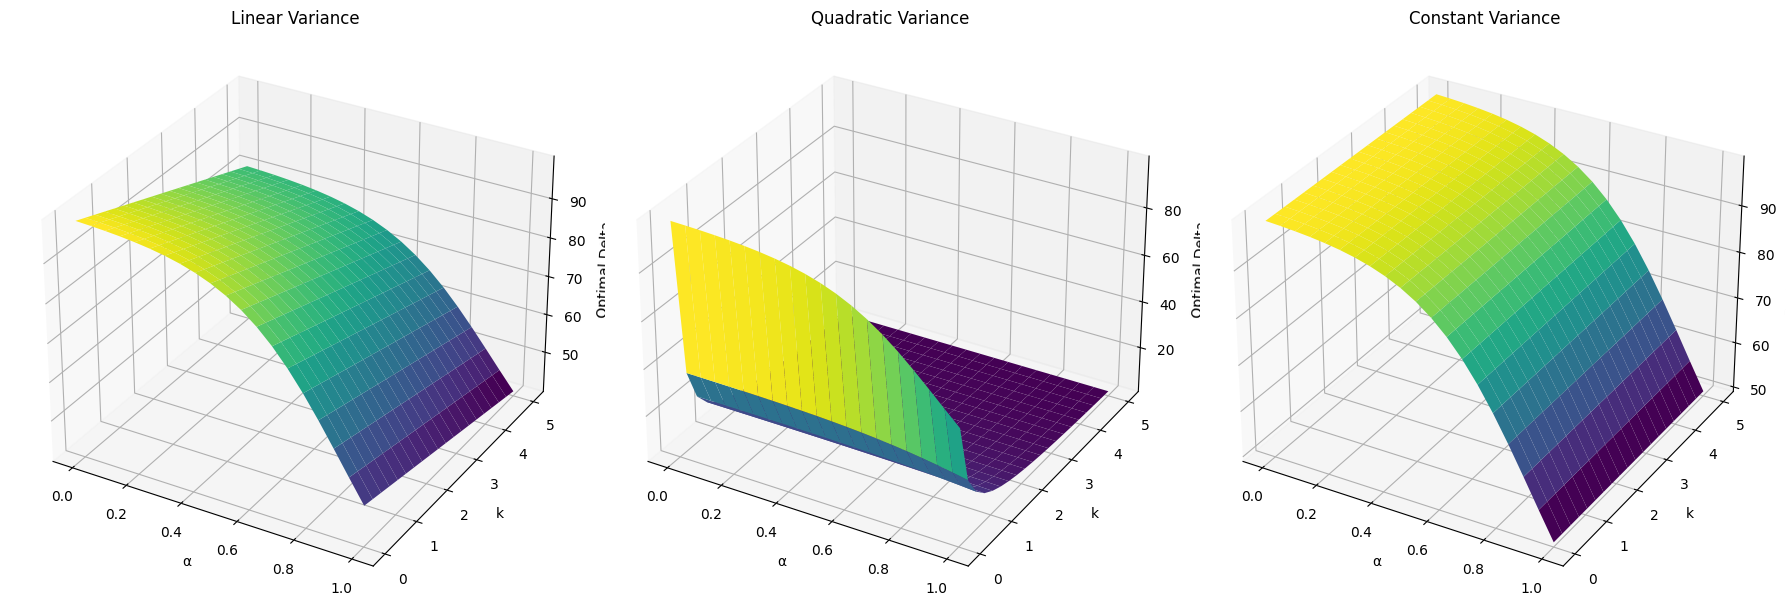

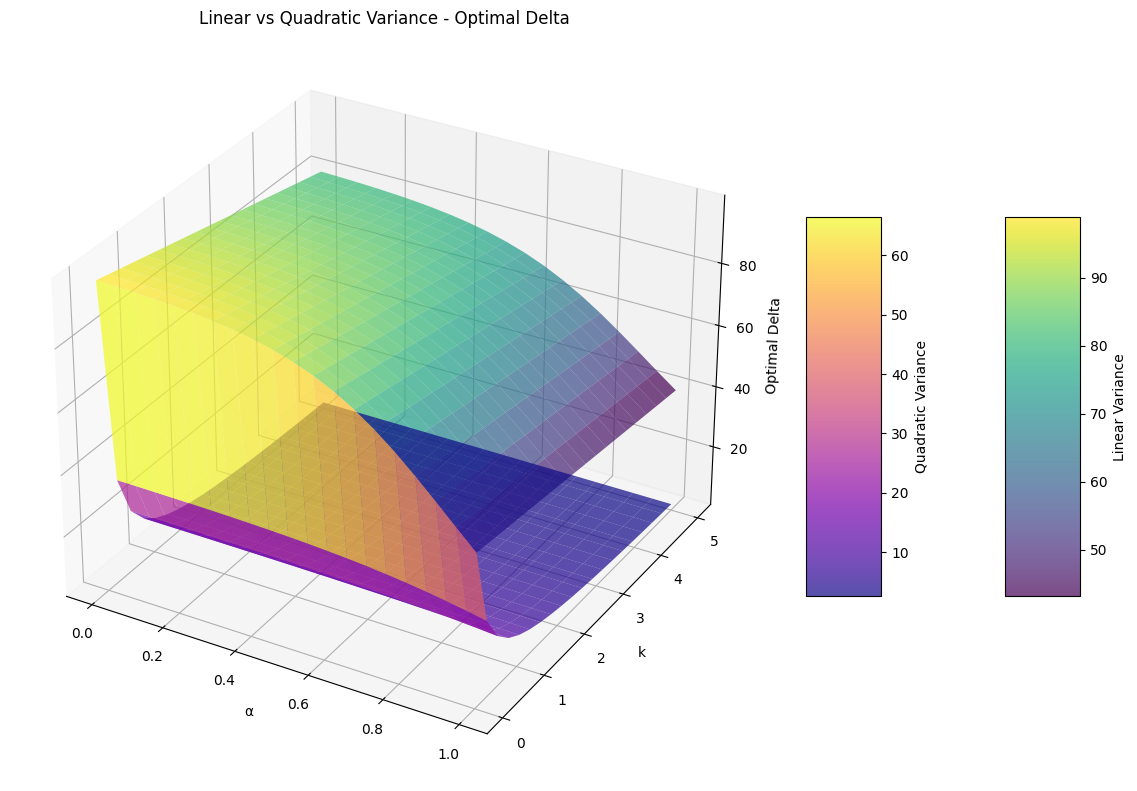

In [16]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define constants
lambda_param = 0.05  # Lambda, tradeoff between mean and variance
R1 = 600
R0 = 300
constant_sigma = 3  # Constant variance

# Define variance functions
def sigma_squared_linear(delta, k):
    return k * delta

def sigma_squared_quadratic(delta, k):
    return k * delta**2

def sigma_squared_constant(sigma):
    return sigma**2

# Create meshgrid for alpha and k values
alpha_values = np.linspace(0, 1, 20)
k_values = np.linspace(0, 5, 20)
alpha_mesh, k_mesh = np.meshgrid(alpha_values, k_values)

# Initialize arrays to store optimal delta values
optimal_delta_linear = np.zeros_like(alpha_mesh)
optimal_delta_quadratic = np.zeros_like(alpha_mesh)
optimal_delta_constant = np.zeros_like(alpha_mesh)

# Perform simulations
for i, k in enumerate(k_values):
    for j, alpha in enumerate(alpha_values):
        delta = cp.Variable()
        
        # Define G1 and G2 terms
        G1_term = 2*(100-delta) - R1 / R0**2 * cp.square(100-delta)
        G2_term = 2*delta - R1 / R0**2 * cp.power(delta, 1+alpha)
        
        # Linear variance
        penalty_term = lambda_param * sigma_squared_linear(delta, k)
        
        objective = cp.Maximize(G1_term + G2_term - penalty_term)
        constraints = [delta >= 0, delta <= 100]
        
        prob = cp.Problem(objective, constraints)
        prob.solve()
        
        optimal_delta_linear[i, j] = delta.value

        # Quadratic variance
        penalty_term = lambda_param * sigma_squared_quadratic(delta, k)
        
        objective = cp.Maximize(G1_term + G2_term - penalty_term)
        constraints = [delta >= 0, delta <= 100]
        
        prob = cp.Problem(objective, constraints)
        prob.solve()
        
        optimal_delta_quadratic[i, j] = delta.value

        # Constant variance
        penalty_term = lambda_param * sigma_squared_constant(constant_sigma)
        
        objective = cp.Maximize(G1_term + G2_term - penalty_term)
        constraints = [delta >= 0, delta <= 100]
        
        prob = cp.Problem(objective, constraints)
        prob.solve()
        
        optimal_delta_constant[i, j] = delta.value

# Plotting the results
def plot_3d_surface(ax, X, Y, Z, title):
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('α')
    ax.set_ylabel('k')
    ax.set_zlabel('Optimal Delta')
    ax.set_title(title)
    return surf

# Plot separate surfaces
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(131, projection='3d')
surf1 = plot_3d_surface(ax1, alpha_mesh, k_mesh, optimal_delta_linear, 'Linear Variance')

ax2 = fig.add_subplot(132, projection='3d')
surf2 = plot_3d_surface(ax2, alpha_mesh, k_mesh, optimal_delta_quadratic, 'Quadratic Variance')

ax3 = fig.add_subplot(133, projection='3d')
surf3 = plot_3d_surface(ax3, alpha_mesh, k_mesh, optimal_delta_constant, 'Constant Variance')

plt.tight_layout()
plt.savefig('separate_3d_surfaces_delta.png', dpi=300)
plt.show()

# Plot linear and quadratic surfaces together
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_surface(alpha_mesh, k_mesh, optimal_delta_linear, cmap='viridis', alpha=0.7)
surf2 = ax.plot_surface(alpha_mesh, k_mesh, optimal_delta_quadratic, cmap='plasma', alpha=0.7)

ax.set_xlabel('α')
ax.set_ylabel('k')
ax.set_zlabel('Optimal Delta')
ax.set_title('Linear vs Quadratic Variance - Optimal Delta')

# Add a color bar which maps values to colors
fig.colorbar(surf1, shrink=0.5, aspect=5, label='Linear Variance')
fig.colorbar(surf2, shrink=0.5, aspect=5, label='Quadratic Variance')

plt.tight_layout()
plt.savefig('combined_3d_surface_delta.png', dpi=300)
plt.show()

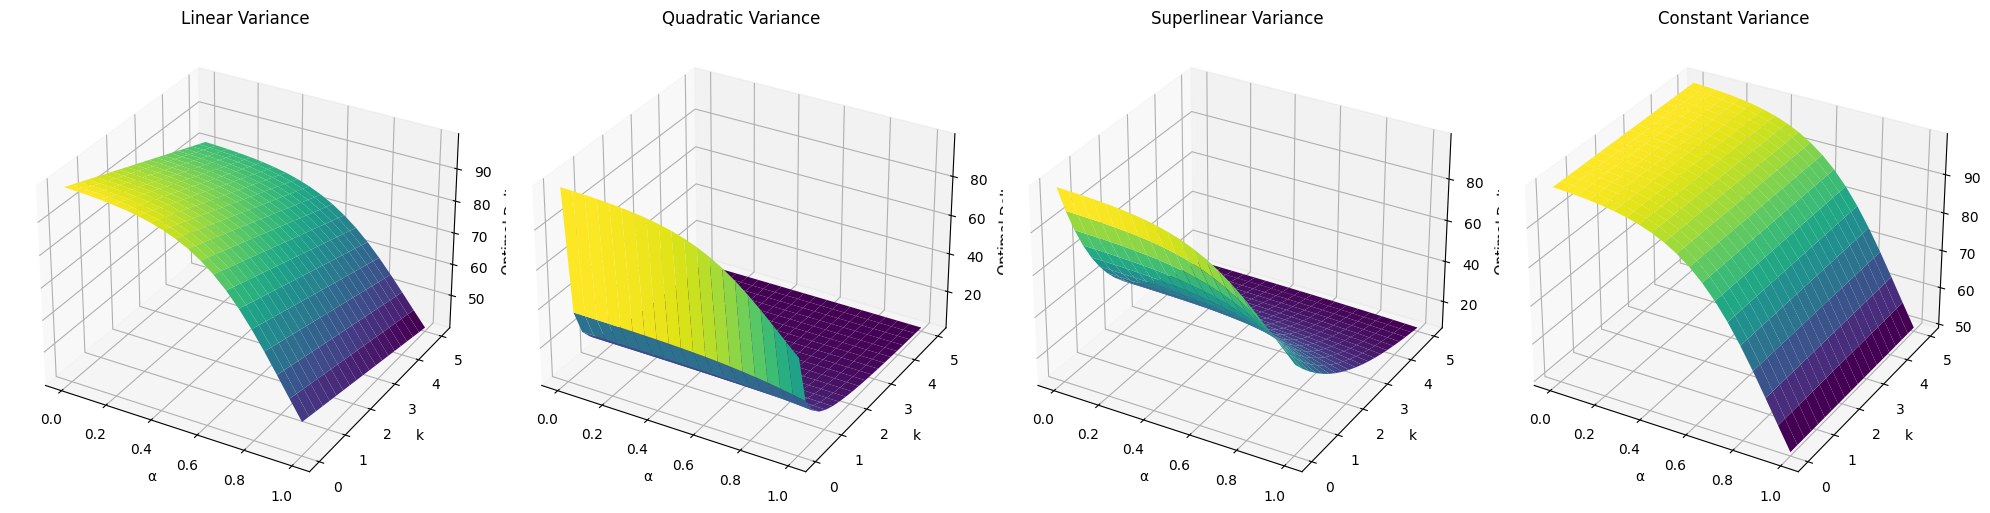

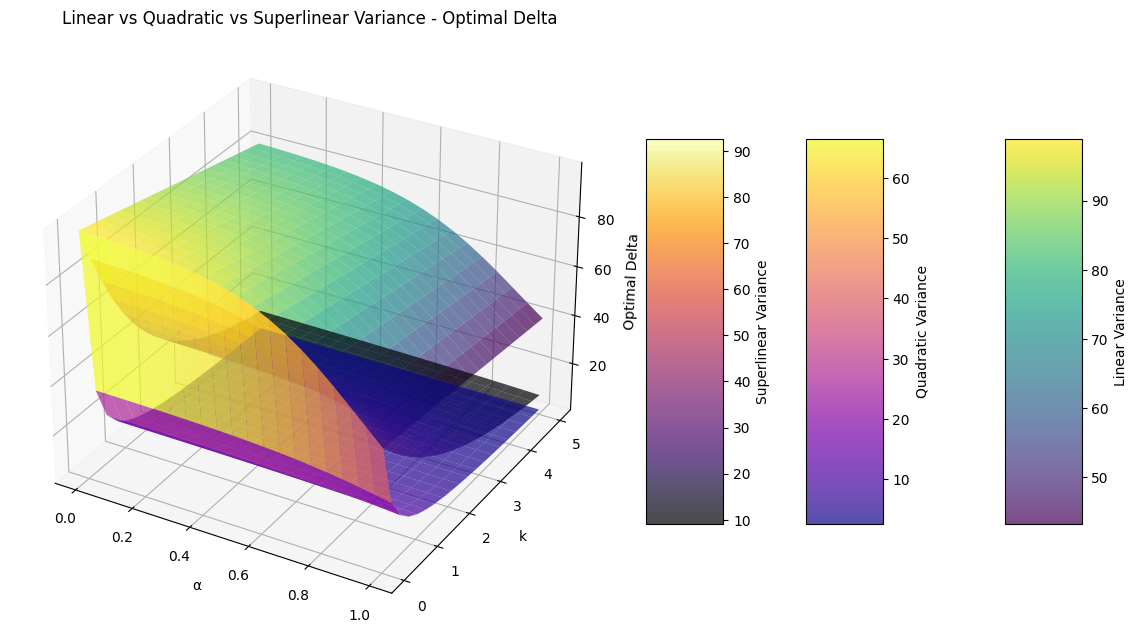

In [17]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define constants
lambda_param = 0.05  # Lambda, tradeoff between mean and variance
R1 = 600
R0 = 300
constant_sigma = 3  # Constant variance

# Define variance functions
def sigma_squared_linear(delta, k):
    return k * delta

def sigma_squared_quadratic(delta, k):
    return k * delta**2

def sigma_squared_superlinear(delta, k):
    return k * delta**1.5

def sigma_squared_constant(sigma):
    return sigma**2

# Create meshgrid for alpha and k values
alpha_values = np.linspace(0, 1, 20)
k_values = np.linspace(0, 5, 20)
alpha_mesh, k_mesh = np.meshgrid(alpha_values, k_values)

# Initialize arrays to store optimal delta values
optimal_delta_linear = np.zeros_like(alpha_mesh)
optimal_delta_quadratic = np.zeros_like(alpha_mesh)
optimal_delta_superlinear = np.zeros_like(alpha_mesh)
optimal_delta_constant = np.zeros_like(alpha_mesh)

# Perform simulations
for i, k in enumerate(k_values):
    for j, alpha in enumerate(alpha_values):
        delta = cp.Variable()
        
        # Define G1 and G2 terms
        G1_term = 2*(100-delta) - R1 / R0**2 * cp.square(100-delta)
        G2_term = 2*delta - R1 / R0**2 * cp.power(delta, 1+alpha)
        
        # Linear variance
        penalty_term = lambda_param * sigma_squared_linear(delta, k)
        objective = cp.Maximize(G1_term + G2_term - penalty_term)
        constraints = [delta >= 0, delta <= 100]
        prob = cp.Problem(objective, constraints)
        prob.solve()
        optimal_delta_linear[i, j] = delta.value

        # Quadratic variance
        penalty_term = lambda_param * sigma_squared_quadratic(delta, k)
        objective = cp.Maximize(G1_term + G2_term - penalty_term)
        constraints = [delta >= 0, delta <= 100]
        prob = cp.Problem(objective, constraints)
        prob.solve()
        optimal_delta_quadratic[i, j] = delta.value

        # Superlinear variance
        penalty_term = lambda_param * sigma_squared_superlinear(delta, k)
        objective = cp.Maximize(G1_term + G2_term - penalty_term)
        constraints = [delta >= 0, delta <= 100]
        prob = cp.Problem(objective, constraints)
        prob.solve()
        optimal_delta_superlinear[i, j] = delta.value

        # Constant variance
        penalty_term = lambda_param * sigma_squared_constant(constant_sigma)
        objective = cp.Maximize(G1_term + G2_term - penalty_term)
        constraints = [delta >= 0, delta <= 100]
        prob = cp.Problem(objective, constraints)
        prob.solve()
        optimal_delta_constant[i, j] = delta.value

# Plotting the results
def plot_3d_surface(ax, X, Y, Z, title):
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('α')
    ax.set_ylabel('k')
    ax.set_zlabel('Optimal Delta')
    ax.set_title(title)
    return surf

# Plot separate surfaces
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(141, projection='3d')
surf1 = plot_3d_surface(ax1, alpha_mesh, k_mesh, optimal_delta_linear, 'Linear Variance')

ax2 = fig.add_subplot(142, projection='3d')
surf2 = plot_3d_surface(ax2, alpha_mesh, k_mesh, optimal_delta_quadratic, 'Quadratic Variance')

ax3 = fig.add_subplot(143, projection='3d')
surf3 = plot_3d_surface(ax3, alpha_mesh, k_mesh, optimal_delta_superlinear, 'Superlinear Variance')

ax4 = fig.add_subplot(144, projection='3d')
surf4 = plot_3d_surface(ax4, alpha_mesh, k_mesh, optimal_delta_constant, 'Constant Variance')

plt.tight_layout()
plt.savefig('separate_3d_surfaces_delta.png', dpi=300)
plt.show()

# Plot linear, quadratic, and superlinear surfaces together
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_surface(alpha_mesh, k_mesh, optimal_delta_linear, cmap='viridis', alpha=0.7)
surf2 = ax.plot_surface(alpha_mesh, k_mesh, optimal_delta_quadratic, cmap='plasma', alpha=0.7)
surf3 = ax.plot_surface(alpha_mesh, k_mesh, optimal_delta_superlinear, cmap='inferno', alpha=0.7)

ax.set_xlabel('α')
ax.set_ylabel('k')
ax.set_zlabel('Optimal Delta')
ax.set_title('Linear vs Quadratic vs Superlinear Variance - Optimal Delta')

# Add color bars which map values to colors
fig.colorbar(surf1, shrink=0.5, aspect=5, label='Linear Variance')
fig.colorbar(surf2, shrink=0.5, aspect=5, label='Quadratic Variance')
fig.colorbar(surf3, shrink=0.5, aspect=5, label='Superlinear Variance')

plt.tight_layout()
plt.savefig('combined_3d_surface_delta.png', dpi=300)
plt.show()

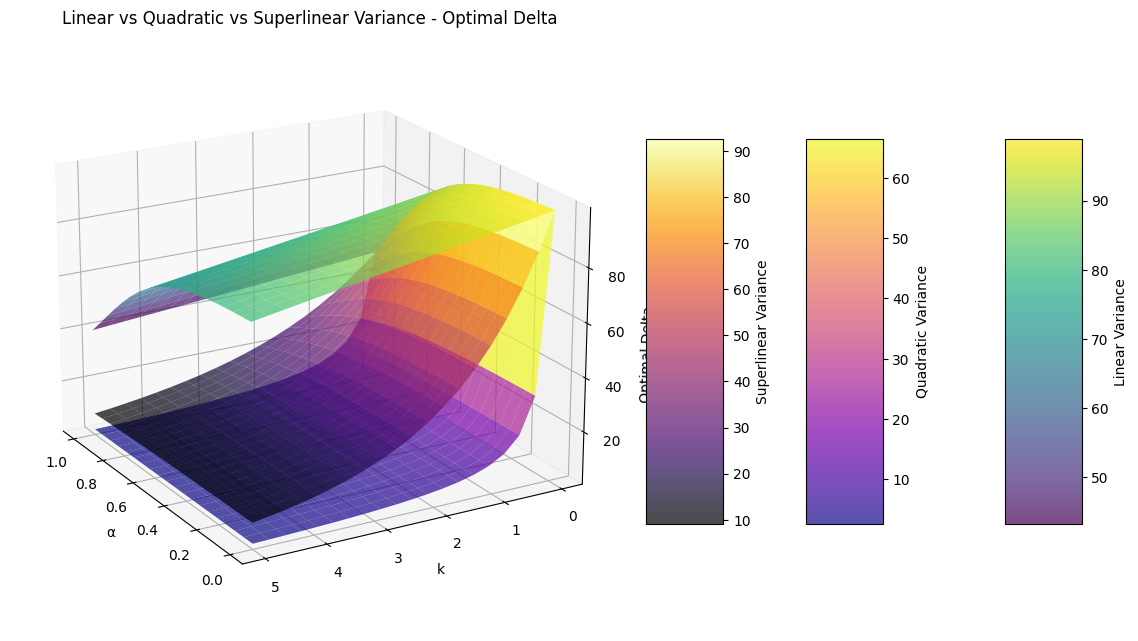

In [18]:
# Plot linear, quadratic, and superlinear surfaces together
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_surface(alpha_mesh, k_mesh, optimal_delta_linear, cmap='viridis', alpha=0.7)
surf2 = ax.plot_surface(alpha_mesh, k_mesh, optimal_delta_quadratic, cmap='plasma', alpha=0.7)
surf3 = ax.plot_surface(alpha_mesh, k_mesh, optimal_delta_superlinear, cmap='inferno', alpha=0.7)

ax.set_xlabel('α')
ax.set_ylabel('k')
ax.set_zlabel('Optimal Delta')
ax.set_title('Linear vs Quadratic vs Superlinear Variance - Optimal Delta')

# Rotate the view
ax.view_init(elev=20, azim=150)  # 20 degree elevation, 40 degree azimuth

# Add color bars which map values to colors
fig.colorbar(surf1, shrink=0.5, aspect=5, label='Linear Variance')
fig.colorbar(surf2, shrink=0.5, aspect=5, label='Quadratic Variance')
fig.colorbar(surf3, shrink=0.5, aspect=5, label='Superlinear Variance')

plt.tight_layout()
plt.savefig('combined_3d_surface_delta_rotated.png', dpi=300)
plt.show()

TypeError: 'float' object is not iterable

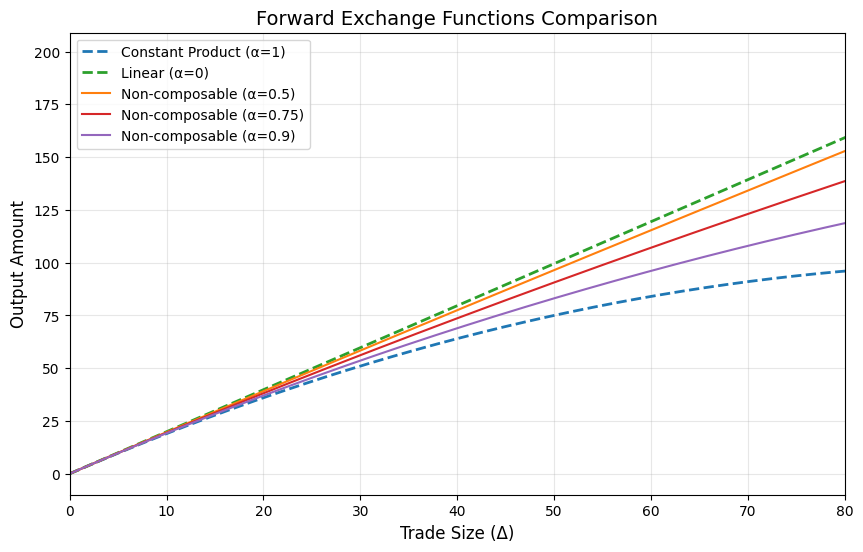

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Parameters
R1 = 400
R0 = 200

# Create trade size array
delta = np.linspace(0, 100, 1000)

# Define forward exchange functions
def G_constant_product(d):
    """Constant product forward exchange function (α=1)"""
    return 2*d - (R1/R0**2)*d**2

def G_linear(d):
    """Linear forward exchange function (α=0)"""
    return 2*d - (R1/R0**2)*d

def G_noncomposable(d, alpha):
    """Non-composable hook forward exchange function with variable alpha"""
    return 2*d - (R1/R0**2)*d**(1+alpha)

# Create figure
plt.figure(figsize=(10, 6))

# Plot constant product CFMM
plt.plot(delta, G_constant_product(delta), 
         label='Constant Product (α=1)', 
         linestyle='--', 
         color='#1f77b4',
         linewidth=2)

# Plot linear exchange
plt.plot(delta, G_linear(delta), 
         label='Linear (α=0)', 
         linestyle='--', 
         color='#2ca02c',
         linewidth=2)

# Plot non-composable hook with different alpha values
alpha_values = [0.5, 0.75, 0.9]
colors = ['#ff7f0e', '#d62728', '#9467bd']

for alpha, color in zip(alpha_values, colors):
    plt.plot(delta, G_noncomposable(delta, alpha), 
             label=f'Non-composable (α={alpha})', 
             color=color,
             linewidth=1.5)

# Customize plot
plt.xlabel('Trade Size (Δ)', fontsize=12)
plt.ylabel('Output Amount', fontsize=12)
plt.title('Forward Exchange Functions Comparison', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Set axis limits
plt.xlim(0, 80)
plt.ylim(0, max(G_linear(100)) * 1.1)

# Format ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x)}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x)}'))

# Adjust layout and save
plt.tight_layout()
plt.savefig('forward_exchange_functions.png', dpi=300, bbox_inches='tight')
plt.show()